First few rows of the dataset:
         date  l_ipn  r_asn  f
0  2006-07-01      0    701  1
1  2006-07-01      0    714  1
2  2006-07-01      0   1239  1
3  2006-07-01      0   1680  1
4  2006-07-01      0   2514  1

Summary statistics of the dataset:
              l_ipn         r_asn              f
count  20803.000000  20803.000000   20803.000000
mean       4.228236  12138.320338      93.914243
std        3.278183   9766.324252    5764.995269
min        0.000000      3.000000       1.000000
25%        1.000000   4323.000000       1.000000
50%        4.000000   8764.000000       2.000000
75%        7.000000  17676.000000       8.000000
max        9.000000  40092.000000  784234.000000

Checking for missing values:
l_ipn    0
r_asn    0
f        0
dtype: int64

Correlation heatmap:


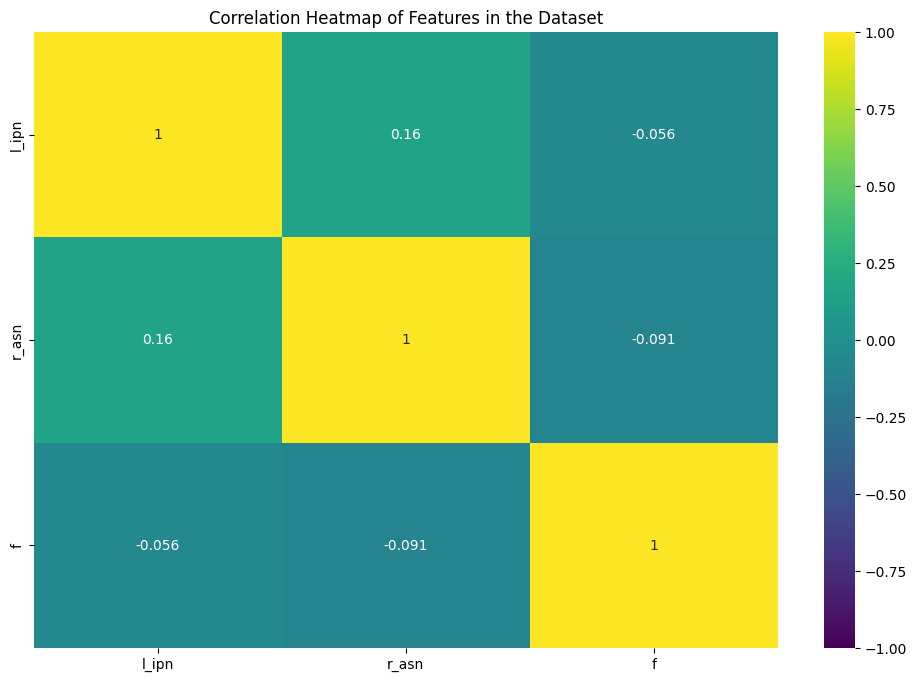


Regression Model Performance:
Mean Squared Error (MSE): 40847.46250997291
Root Mean Squared Error (RMSE): 202.10755183805702
R² Score: 0.19372219837727
Mean Absolute Error (MAE): 47.035556504400944


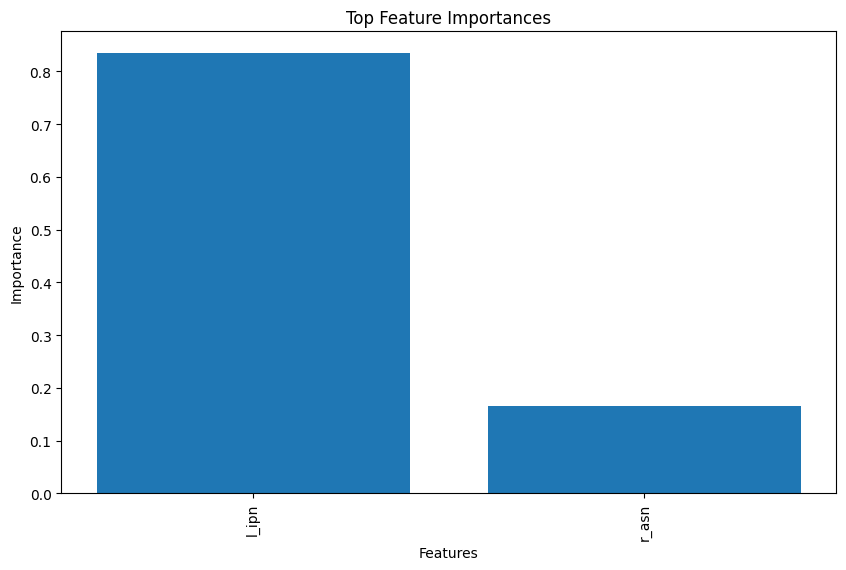


Classification-like Metrics (Threshold: 0.5):
Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0

Cross-Validation R² Scores: [-0.1712205   0.08697578 -0.00043702]
Mean Cross-Validation R² Score: -0.02822724769302472


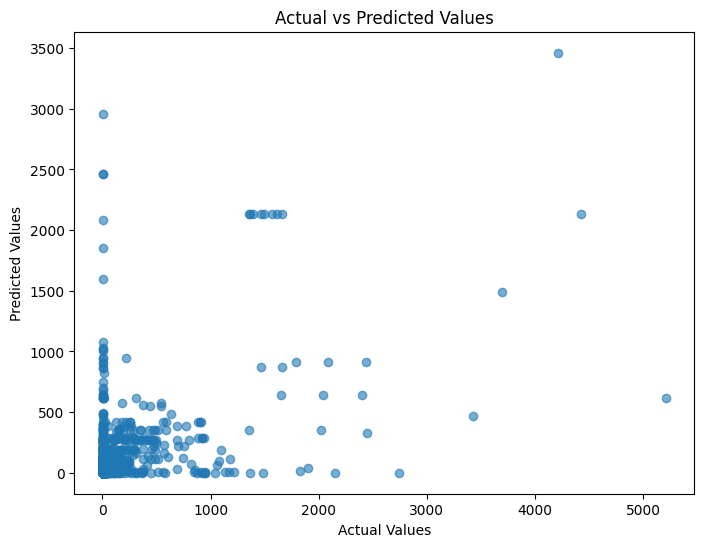


Model saved as 'model.pkl'


In [18]:
# Importing Required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Data Loading and Initial Exploration
# Load the dataset (make sure to update the file path to match the actual file location)
file_path = '/content/cs448b_ipasn.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to get an overview
print("First few rows of the dataset:")
print(df.head())

# Display summary statistics to understand the distribution of features
print("\nSummary statistics of the dataset:")
print(df.describe())

# Data Preprocessing
# Convert the 'date' column to datetime format if it's relevant to time-based analysis
# In case 'date' is not useful, we drop it to avoid unnecessary complexity
df['date'] = pd.to_datetime(df['date'])
df = df.drop(columns=['date'])  # Dropping 'date' column if it doesn't provide predictive value

# Exploratory Data Analysis (EDA)
# Checking for missing values in the dataset
print("\nChecking for missing values:")
print(df.isnull().sum())

# Visualizing Correlations between features using a heatmap
# Sampling 100 rows to avoid rendering a heatmap for a large dataset
print("\nCorrelation heatmap:")
plt.figure(figsize=(12, 8))
sns.heatmap(df.sample(100).corr(), annot=True, cmap="viridis", vmin=-1, vmax=1)  # Sample data for faster execution
plt.title("Correlation Heatmap of Features in the Dataset")
plt.show()

# Handling Missing Values
# Drop rows with missing values to maintain data integrity and avoid errors during model training
df = df.dropna()

# Defining Features and Target Variable
# 'f' is the target column, replace 'f' with the actual column name of the target variable
X = df.drop("f", axis=1)  # Features (exclude the target column)
y = df["f"]  # Target variable (the column to predict)

# Feature Scaling
# Standardizing the features to ensure all features have the same scale
# This improves model performance, especially for algorithms sensitive to feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the Data into Training and Testing Sets
# 80% training data and 20% testing data to evaluate the model's performance on unseen data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Training - Random Forest Regressor
# Using Random Forest Regressor with a smaller number of estimators for faster execution during prototyping
model = RandomForestRegressor(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# Prediction and Model Evaluation
# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculate the performance metrics for the regression model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)  # R-squared score
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error (MAE)

print(f"\nRegression Model Performance:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

# Feature Importance Analysis
# Analyzing which features have the most impact on the model's predictions
feature_importances = model.feature_importances_

# Dynamically selecting the top features based on their importance
num_features = min(10, len(feature_importances))  # Show up to 10 most important features
sorted_idx = np.argsort(feature_importances)[-num_features:][::-1]  # Sorting features by importance

# Plotting the top feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(num_features), feature_importances[sorted_idx], align='center')
plt.xticks(range(num_features), np.array(X.columns)[sorted_idx], rotation=90)
plt.title("Top Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

# Optional: Classification-like Metrics (if the problem context involves binary classification)
# If predicting continuous values but needing binary classification-like evaluation, apply binning
threshold = 0.5  # Adjust this threshold based on the problem context

# Convert actual and predicted values to binary categories based on the threshold
y_test_classified = (y_test >= threshold).astype(int)
y_pred_classified = (y_pred >= threshold).astype(int)

# Calculate classification metrics such as accuracy, F1 score, precision, and recall
accuracy = accuracy_score(y_test_classified, y_pred_classified)
f1 = f1_score(y_test_classified, y_pred_classified, average="weighted")
precision = precision_score(y_test_classified, y_pred_classified, average="weighted")
recall = recall_score(y_test_classified, y_pred_classified, average="weighted")

print(f"\nClassification-like Metrics (Threshold: {threshold}):")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Cross-Validation - Evaluating the model using k-fold cross-validation (fewer folds for faster execution)
# This helps ensure that the model performs well across different subsets of the data
scores = cross_val_score(model, X_scaled, y, cv=3, scoring="r2")  # Using 3 folds for quicker computation
print("\nCross-Validation R² Scores:", scores)
print("Mean Cross-Validation R² Score:", np.mean(scores))

# Visualization of Model Results
# Scatter plot to visualize the relationship between actual and predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)  # Scatter plot of actual vs predicted values
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

# Save the trained model for future use (optional, for later inference)
joblib.dump(model, 'model.pkl')
print("\nModel saved as 'model.pkl'")

# Final Notes:
# - This project demonstrates a simple yet effective workflow for building a predictive model using Random Forest.
# - The process includes loading and preprocessing data, exploring features, training a model, evaluating performance, and saving the model.
# - Future improvements may include tuning hyperparameters, performing additional feature engineering, or testing with other machine learning models.
